Imports

In [1]:
import os
import importlib
from src import *
from src.dataset import load_dataset
from src.convert import batch_convert_raw_to_wav
from src.train import train_model
from src.detect import detect_wakeword


print(os.listdir("src"))

#from src.convert import batch_convert_raw_to_wav
#from src.features import compute_stft, compute_spectrogram, compute_mel_spectrogram 
#from src.dataset import load_dataset
#from src.train import train_model
#from src.detect import detect_wakeword

RAW_FOLDER = "data/raw"
WAV_FOLDER = "data/wav"
ETIQUETAS = "data/etiquetas.csv"
MODEL_PATH = "modelo.pkl"



['preprocess.py', 'convert.py', 'generate_labels.py', '__init__.py', 'features.py', '__pycache__', 'dataset.py', 'train.py', 'detect.py']


In [2]:


def convertir_a_wav():
    """
    Convierte todos los audios en data/raw/ a WAV mono 16 kHz.
    """
    print("Convirtiendo audios a WAV...")
    batch_convert_raw_to_wav(RAW_FOLDER, WAV_FOLDER)
    print("Conversión finalizada.")


def construir_dataset():
    """
    Construye el dataset X, y a partir de los WAV ya convertidos.
    """
    print("Cargando dataset...")
    X, y = load_dataset(WAV_FOLDER, ETIQUETAS)
    print(f"Dataset cargado: {X.shape[0]} muestras.")
    return X, y


def entrenar_modelo():
    """
    Entrena el modelo de detección de wake-word.
    """
    X, y = construir_dataset()
    print("Entrenando modelo...")
    train_model(X, y, model_path=MODEL_PATH)
    print("Entrenamiento finalizado.")


def detectar(audio_path):
    """
    Detecta la wake-word en un audio ya preprocesado.
    """
    print(f"Analizando archivo: {audio_path}")
    detect_wakeword(audio_path, model_path=MODEL_PATH)

 


Menú principal del proyecto wake-word
1. Convertir audios de data/raw a WAV
2. Construir dataset
3. Entrenar modelo
4. Detectar wake-word en un archivo
5. Salir
Cargando dataset...
Dataset cargado: 148 muestras.
Dataset generado correctamente.

Menú principal del proyecto wake-word
1. Convertir audios de data/raw a WAV
2. Construir dataset
3. Entrenar modelo
4. Detectar wake-word en un archivo
5. Salir
Cargando dataset...
Dataset cargado: 148 muestras.
Entrenando modelo...

=== Resultados del entrenamiento ===
Precisión: 0.767
Matriz de confusión:
[[ 8  6]
 [ 1 15]]

Modelo guardado en /Users/anamenoni/Library/CloudStorage/OneDrive-UniversidaddeMontevideo/FIUM/Semestre VI FIUM/proyectoMuestreo/wake_up_word_MPD/modelo.pkl
Scaler guardado en /Users/anamenoni/Library/CloudStorage/OneDrive-UniversidaddeMontevideo/FIUM/Semestre VI FIUM/proyectoMuestreo/wake_up_word_MPD/scaler.pkl
Entrenamiento finalizado.

Menú principal del proyecto wake-word
1. Convertir audios de data/raw a WAV
2. Const

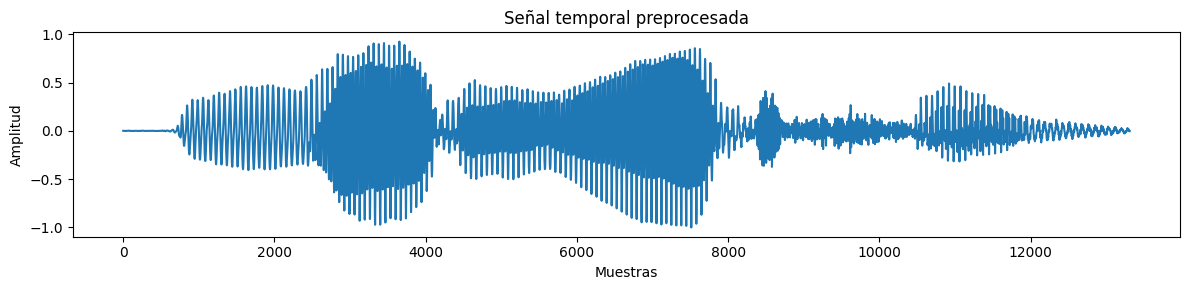

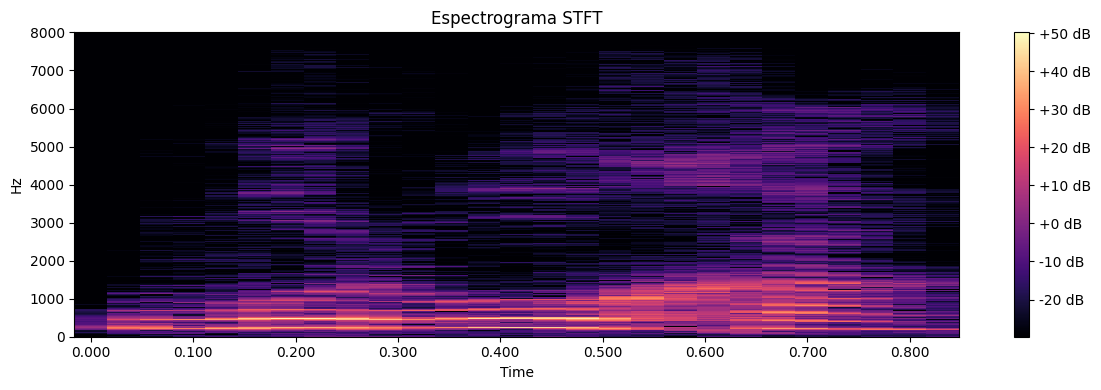

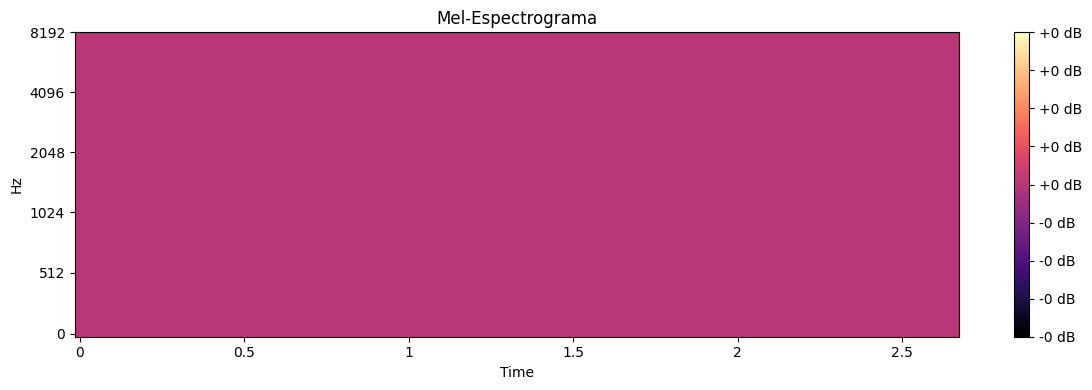

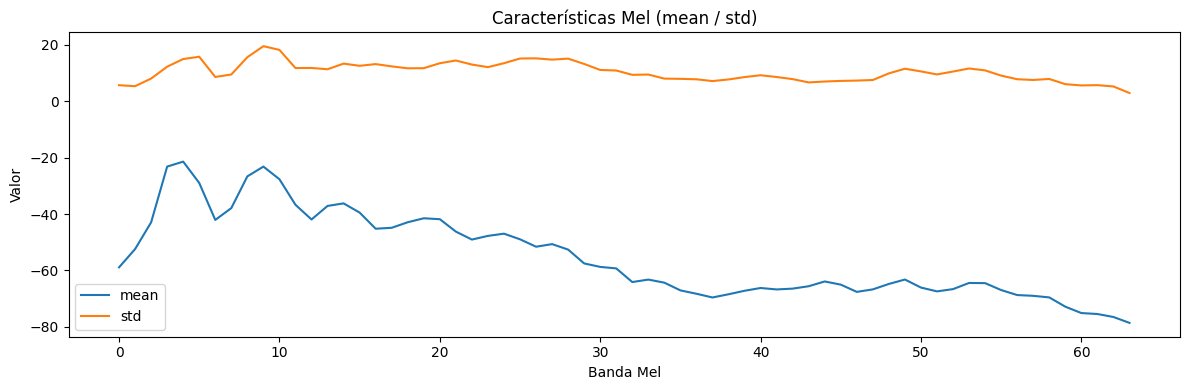

Wake-word detectada.

Menú principal del proyecto wake-word
1. Convertir audios de data/raw a WAV
2. Construir dataset
3. Entrenar modelo
4. Detectar wake-word en un archivo
5. Salir
Saliendo.


In [3]:
if __name__ == "__main__":

    while True:
        print("\nMenú principal del proyecto wake-word")
        print("1. Convertir audios de data/raw a WAV")
        print("2. Construir dataset")
        print("3. Entrenar modelo")
        print("4. Detectar wake-word en un archivo")
        print("5. Salir")

        opcion = input("Seleccione una opción: ")

        if opcion == "1":
            convertir_a_wav()

        elif opcion == "2":
            X, y = construir_dataset()
            print("Dataset generado correctamente.")

        elif opcion == "3":
            entrenar_modelo()

        elif opcion == "4":
            archivo = input("Ruta del archivo WAV a analizar: ")
            detectar(archivo)

        elif opcion == "5":
            print("Saliendo.")
            break

        else:
            print("Opción inválida. Intente nuevamente.")